### Problem Statement

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

Data sourcing and sentiment analysis Building a recommendation system Improving the recommendations using the sentiment analysis model Deploying the end-to-end project with a user interface

In [3]:
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

#### Loading the Data

In [4]:
df =pd.read_csv("C:\\Users\\moham\\Downloads\\inputs\\sample30.csv")

In [5]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


### EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [7]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [8]:
#removing the null row from user_sentiment
df=df[~df.user_sentiment.isnull()]

In [9]:
df.shape

(29999, 15)

In [10]:
#Mapping Positive and Negative from user sentiment to 1 and 0
df.user_sentiment=df.user_sentiment.map({"Positive":1,"Negative":0})

In [11]:
#Seeing disturbution of data in user_sentiment
df.user_sentiment.value_counts(normalize=True)

1    0.887763
0    0.112237
Name: user_sentiment, dtype: float64

We can see there is around 88% of data giving a positive sentiment. This is a case of class imbalance and we need to do Class imbalance techniques durring Model building.

In [12]:
#Understanding the reviews_rating column
df.reviews_rating.value_counts(normalize=True)

5    0.694356
4    0.200673
1    0.046135
3    0.044835
2    0.014000
Name: reviews_rating, dtype: float64

In [13]:
df.reviews_rating.value_counts()

5    20830
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

In [14]:
df[(df.user_sentiment==0) & (df.reviews_rating==5)]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
211,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-06-04T00:00:00.000Z,False,True,5,this product makes my face feel like I have de...,drenched,NaN,NaN,steph710,0
213,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-05-26T00:00:00.000Z,False,True,5,After using a short time it totally changed th...,This serum rocks!,NaN,NaN,jojo296,0
215,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-06-01T00:00:00.000Z,False,True,5,I like the feel and texture of my skin after u...,Thirsty skin Hydration,NaN,NaN,beau1230,0
216,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-05-26T00:00:00.000Z,False,True,5,"No wrinkles for me, no worrying either because...",OLAY and ME,NaN,NaN,onectmom,0
217,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-05-26T00:00:00.000Z,False,True,5,This product gives my face a starry appearance...,Look and feel like stars and silk!,NaN,NaN,starlady,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29818,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2016-12-21T00:00:00.000Z,False,NaN,5,I received a complimentary sample of this prod...,Great Product,NaN,NaN,cindi d,0
29855,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-14T00:00:00.000Z,False,True,5,This has prolonged the color in my hair! Not o...,Great,NaN,NaN,meghanz,0
29858,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2016-12-30T00:00:00.000Z,False,True,5,This conditioner makes my hair very soft witho...,Makes my hair soft and shiny without excess oil!,NaN,NaN,melissa7390,0
29862,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-18T00:00:00.000Z,False,True,5,This conditioner has become a staple in my hai...,Great Conditioner,NaN,NaN,kacils,0


In [15]:
df[(df.user_sentiment==1) & (df.reviews_rating==1)]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
9,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-21T00:00:00.000Z,False,False,1,Got as a surprise for my husband there is noth...,Don't buy,NaN,NaN,moore222,1
11,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-05T00:00:00.000Z,False,False,1,Purchased this thinking it would have some sor...,Waste of Money,NaN,NaN,bre234,1
14,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-09T00:00:00.000Z,False,False,1,First time purchase of this type of product. M...,Disappointed,NaN,NaN,nicole,1
54,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2014-09-01T00:00:00.000Z,False,False,1,I used (and loved) this product for several ye...,New formula is terrible,NaN,NaN,alnscoob97,1
56,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2014-09-07T00:00:00.000Z,False,False,1,I am so disappointed! I have used this product...,Please bring back the old formula,NaN,NaN,jacmary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T06:47:57.000Z,NaN,NaN,1,I'm happy I got to try this courtesy of Influe...,Not Good,NaN,NaN,neighha,1
28832,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T04:39:33.000Z,NaN,True,1,I can see this working AMAZINGLY for someone w...,Wrong For Me,NaN,NaN,nmm2592,1
28833,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T16:40:01.000Z,NaN,NaN,1,When I got these products in the mail I was ac...,Nothing Extraordinary About It!,Houston,NaN,kimberlyp721,1
28834,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-19T21:27:44.000Z,NaN,NaN,1,I was so excited about receiving this free to ...,Makes My Hair Worse,NaN,NaN,rachie0814,1


In [16]:
pd.crosstab(df.user_sentiment, df.reviews_rating, margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,597,140,220,550,1860,3367
1,787,280,1125,5470,18970,26632
All,1384,420,1345,6020,20830,29999


From the above tables we can see that there is mismatch between user rating and sentiment that are recorded. we need to clean up this records or update the target column based on the user ratings.

In [17]:
#Updating User_sentiment value based on the review ratings
df.loc[(df.user_sentiment==1) & (df.reviews_rating<4), "user_sentiment"] = 0

In [18]:
df.loc[(df.user_sentiment==0) & (df.reviews_rating>=4), "user_sentiment"] = 1

In [19]:
pd.crosstab(df.user_sentiment, df.reviews_rating, margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,1384,420,1345,0,0,3149
1,0,0,0,6020,20830,26850
All,1384,420,1345,6020,20830,29999


From the above table we can see we have corrected the value mismatch between the reviews_rating and user_sentiment

In [20]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14067
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28070
reviews_userProvince    29830
reviews_username           63
user_sentiment              0
dtype: int64

In [21]:
#Understanding Brand column
#Seeing top top 10 Brands with positive sentiment
df[df.user_sentiment==1].brand.value_counts(normalize=True)[:10]

Clorox                  0.389460
Warner Home Video       0.107374
Disney                  0.042793
L'oreal Paris           0.035158
Burt's Bees             0.030615
Sony Pictures           0.030242
Summit Entertainment    0.028603
FOX                     0.028045
Olay                    0.022309
Universal Home Video    0.022197
Name: brand, dtype: float64

In [22]:
#Seeing top top 10 Brands with negative sentiment
df[df.user_sentiment==0].brand.value_counts(normalize=True)[:10]

Nexxus                        0.203874
Warner Home Video             0.140362
L'oreal Paris                 0.076850
Clear Scalp & Hair Therapy    0.065735
FOX                           0.042553
Clorox                        0.040648
Aveeno                        0.039695
Windex                        0.023500
Universal Home Video          0.022864
Burt's Bees                   0.018736
Name: brand, dtype: float64

In [23]:
#finding out the most common users.
df.reviews_username.value_counts()[:10]

mike                 41
byamazon customer    41
chris                32
lisa                 16
sandy                15
tony                 15
rick                 15
dave                 14
john                 14
jojo                 13
Name: reviews_username, dtype: int64

In [24]:
#checking the customers by 'positive user sentiment'
df[df.user_sentiment==1].reviews_username.value_counts()[:10]

mike                 36
byamazon customer    31
chris                29
lisa                 14
tony                 14
jojo                 13
john                 13
rick                 13
sandy                13
matt                 12
Name: reviews_username, dtype: int64

In [25]:
#checking the customers by 'negative user sentiment'
df[df.user_sentiment==0].reviews_username.value_counts()[:10]

byamazon customer    10
disappointed          5
julie                 5
mike                  5
mark                  4
kevman79              4
island girl           4
jill                  4
cool                  4
kate                  3
Name: reviews_username, dtype: int64

In [26]:
#removing nan/null from username
df = df[~df.reviews_username.isnull()]

In [27]:
#Let's combine the reviews_text and reviews_title for better analysis
df.reviews_title = df.reviews_title.fillna('')
df["reviews_full_text"] = df[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')

In [28]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               40
reviews_didPurchase     14005
reviews_doRecommend      2541
reviews_rating              0
reviews_text                0
reviews_title               0
reviews_userCity        28036
reviews_userProvince    29770
reviews_username            0
user_sentiment              0
reviews_full_text           0
dtype: int64

Required columns such as reviews_rating, reviews_text, user_sentiment,reviews_username doesn't have null values

#### Text Preprocessing for Modelling 

In [32]:
import re
import string
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)
pd.set_option("display.precision", 2)

In [33]:
df[["user_sentiment","reviews_full_text"]].sample(10)

,user_sentiment,reviews_full_text
8255,1,My Clorox Wipes Review. works great! I use it for cleaning everything. Smells good too! This review was collected as part of a promotion.
27214,1,Can't live without!!. I use Vicks on my moms feet for neuropathy and also helps dry skin.Vicks and two pairs of cotton socks keeps us happy.
21989,1,"nice, bright LED bulb. bought this to replace a burned out CFL the builder had installed in our two year old home. seems just as bright if not brighter than the CFL it replaced, even despite it being listed at 700 fewer lumens (800 for this bulb vs 1500 for the CFL it replaced). has been install..."
24339,1,"Good movie. Bought this for my husband, he is a huge Godzilla fan and he loves this movie. I saw it with him and I enjoyed it too. Special effects are great, pretty good story line (for this kind of movie) and overall good time."
9309,1,Easy Way To Kill Germs. The can is a nice size and is easy to spray. I enjoy the lemon scent. It makes the area seem fresher. This review was collected as part of a promotion.
21558,0,Bad Choice. I have used this gel for 20 years and always loved it. They recently changed the formula including the scent and it's horrible. . The hold is different. It's not as good. PLEASE BRING THE OLD GEL BACK.
18869,1,Cleans good. This product cleans well now I know everything is disinfected
19657,1,Excellent!. I love using this cleaner because it cleans and disinfects my bathroom. It smells clean and fresh every time I clean my bathroom with it.
29460,1,"Makes My Hair Feel Amazing!. I received this shampoo as part of a complimentary 3-piece Extraordinary Clay pack from Influenster. After using the clay mask in my roots and shampooing twice, the ends of my hair definitely felt dry and brittle. However as soon as I put the conditioner on, everythi..."
6406,1,"Superb. Product is great for hot dogs, sausage, or just as a meal."


In [39]:
#Function to clean the text
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r'\[\s*\w*\s*\]', '', text)
    dictionary = "abc".maketrans('', '', string.punctuation)
    text = text.translate(dictionary)
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    return text

In [41]:
df1=df[["id","name","reviews_full_text","user_sentiment"]]

In [43]:
df1["reviews_text"] = df1.reviews_full_text.apply(clean_text)

In [44]:
df1.head()

,id,name,reviews_full_text,user_sentiment,reviews_text
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it rating all the way her metaphors are just crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected as part of a promotion.,1,good good flavor this review was collected as part of a promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,1,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation...",0,disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what w...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,0,irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel


In [45]:
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [47]:
# NLTK libraries
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [48]:
#Function to remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [50]:
lemmatizer = WordNetLemmatizer()
#Lemmatizing the sentence
def lemma_text(text):
    word_pos_tags = nltk.pos_tag(word_tokenize(remove_stopword(text))) # Get position tags
    #Map the position tag and lemmatize the word/token
    words =[lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] 
    return " ".join(words)

In [51]:
df1["reviews_text_cleaned"] = df1.reviews_text.apply(lemma_text)

In [52]:
df1.head()

,id,name,reviews_full_text,user_sentiment,reviews_text,reviews_text_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it rating all the way her metaphors are just crazy,awesome love album good hip hop side current pop sound hype listen everyday gym give rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected as part of a promotion.,1,good good flavor this review was collected as part of a promotion,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,1,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation...",0,disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what w...,disappoint read review look buy one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,0,irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,irritation husband buy gel u gel caused irritation felt like burn skin wouldnt recommend gel


reviews_text is cleaned to remove stopwords, punctuations,numericals,whitespaces and lemma is derived.

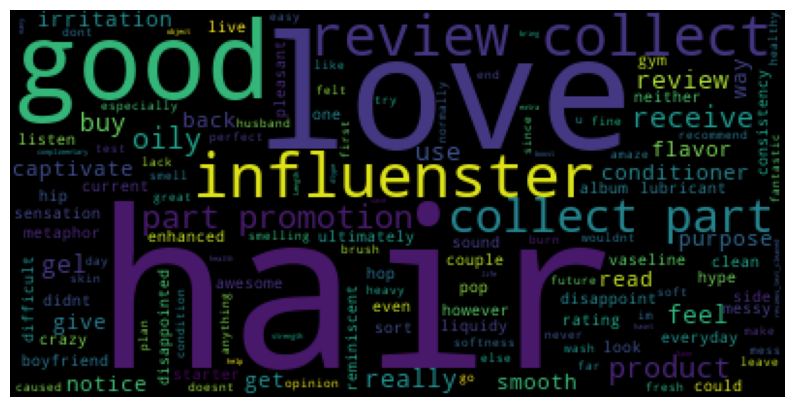

In [55]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stop_words,max_words=200).generate(str(df1.reviews_text_cleaned))

print(wordcloud)
plt.figure(figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();